In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import scale, normalize, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs

%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)

### 8

In [2]:
# Load dataset
arrests = pd.read_csv('../../data/USArrests.csv', index_col=0)
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
# Scale dataset
scl = StandardScaler()
arrests_scaled = scl.fit_transform(arrests)

In [4]:
# Perform PCA
pca = PCA()
pca_model = pca.fit(arrests_scaled)

# Get proportion of variance explained (PVA) directly
pca_model.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [5]:
# Get PVE using formula
for k in range(0,np.shape(pca_model.components_)[1]):
    # Numerator
    accum = 0
    num = 0
    for i in range(0, np.shape(arrests_scaled)[0]):
        for j in range(0, np.shape(arrests_scaled)[1]):
            accum += pca_model.components_[k][j] * arrests_scaled[i][j]
        num += accum**2
        accum = 0

    # Denominator
    accum = 0
    den = 0
    for j in range(0, np.shape(arrests_scaled)[1]):
        for i in range(0, np.shape(arrests_scaled)[0]):
            accum += arrests_scaled[i][j]**2
        den += accum
        accum = 0

    # Result
    print('principal component number:', k+1)
    print(num/den)

principal component number: 1
0.6200603947873735
principal component number: 2
0.24744128813496036
principal component number: 3
0.08914079514520756
principal component number: 4
0.043357521932458856


### 9

In [6]:
# Load dataset
arrests = pd.read_csv('../../data/USArrests.csv', index_col=0)
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [7]:
# Scale dataset
scl = StandardScaler()
arrests_scaled = scl.fit_transform(arrests)
arrests_scaled = pd.DataFrame(arrests_scaled, columns = arrests.columns, index =arrests.index)

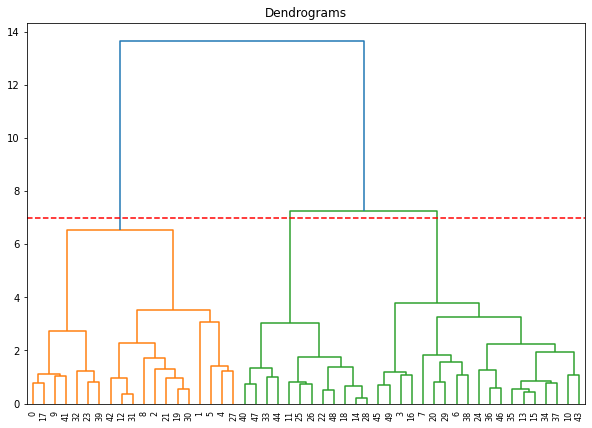

In [8]:
# Create dendogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(arrests_scaled, method='ward'))
plt.axhline(y=7, color='r', linestyle='--')

In [9]:
# Cluster dataset
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster_preds = cluster.fit_predict(arrests_scaled)

In [10]:
# Get the states in each cluster
arrests['Predicted Cluster'] = cluster_preds

arrests = arrests.reset_index().rename(columns = {'index': 'State'})

groups = arrests.groupby('Predicted Cluster')['State'].apply(list)

for cluster, group in enumerate(groups):
    print(cluster, group)

0 ['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina', 'Tennessee', 'Texas']
1 ['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas', 'Kentucky', 'Massachusetts', 'Missouri', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington', 'Wyoming']
2 ['Idaho', 'Iowa', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']


### 10

In [11]:
# Create dataset
X, y = make_blobs(n_samples=60, n_features=50, centers=3, cluster_std=5, random_state=1)

In [12]:
# Perform PCA on dataset
pca = PCA(n_components=2, random_state=1)
X_pca = pca.fit_transform(X)

Text(0, 0.5, 'Second principal component')

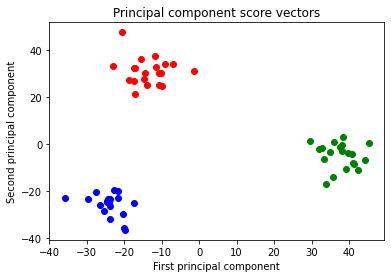

In [13]:
# Visualize PCA
plt.figure()
colors = ['blue', 'red', 'green']

for i,color in enumerate(colors):
    plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], color=color)
plt.title('Principal component score vectors')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [14]:
y

array([0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0])

In [15]:
# K-Means
km = KMeans(n_clusters=3)
km.fit(X)
km.labels_

array([0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2,
       1, 0, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0], dtype=int32)

In [16]:
# K - Means
km = KMeans(n_clusters=2)
km.fit(X)
km.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int32)

In [17]:
# K - Means
km = KMeans(n_clusters=4)
km.fit(X)
km.labels_

array([0, 3, 1, 3, 3, 3, 0, 0, 0, 3, 2, 3, 0, 3, 1, 0, 1, 1, 0, 2, 0, 3,
       1, 0, 0, 1, 1, 1, 0, 3, 1, 3, 0, 1, 3, 1, 1, 1, 1, 3, 1, 1, 0, 3,
       3, 0, 0, 0, 3, 0, 3, 3, 1, 1, 0, 1, 0, 3, 1, 0], dtype=int32)

In [18]:
# K - Means
km = KMeans(n_clusters=3)
km.fit(X_pca)
km.labels_

array([0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2,
       1, 0, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0], dtype=int32)

In [19]:
# K - Means on scaled data
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

km = KMeans(n_clusters=3)
km.fit(X_scaled)
km.labels_

array([1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 2,
       0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1], dtype=int32)

### 11

In [20]:
genes = pd.read_csv('../../data/Ch10Ex11.csv', header=None)
genes.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611


In [21]:
# Normalize data
genes_normalized = normalize(genes)
genes_normalized = pd.DataFrame(genes_normalized, columns = genes.columns)
genes_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.179217,0.082312,-0.181652,0.264093,0.152552,0.058928,-0.004652,-0.011917,0.005868,-0.065266,...,-0.094941,-0.040378,-0.010341,-0.090257,-0.097175,0.363141,0.246735,0.087220,0.197692,0.308522
1,-0.049283,-0.191939,0.032994,-0.215838,-0.042361,0.423210,-0.155369,0.010032,-0.237491,-0.110640,...,0.286528,0.001228,0.016690,0.094996,-0.043345,-0.098016,-0.028622,-0.091365,0.052723,-0.216386
2,0.043760,-0.164504,0.099511,-0.135321,-0.307822,-0.348156,-0.010951,0.269222,-0.029273,-0.020475,...,-0.104074,0.001691,0.159933,-0.053861,-0.019935,0.105071,-0.011966,0.067923,-0.002744,-0.089038
3,-0.155611,-0.298918,-0.116360,0.085215,0.128550,-0.157447,-0.052885,0.143656,-0.047273,-0.201117,...,-0.038395,0.026870,-0.012403,0.047222,-0.040372,0.204445,0.090652,0.001466,-0.140964,0.219515
4,0.029868,0.090513,0.043172,0.037704,0.301859,-0.132880,-0.150988,-0.157477,-0.169285,-0.058756,...,-0.105722,-0.129018,-0.027078,-0.025399,0.226265,-0.257508,-0.021576,0.030630,-0.103120,0.338769


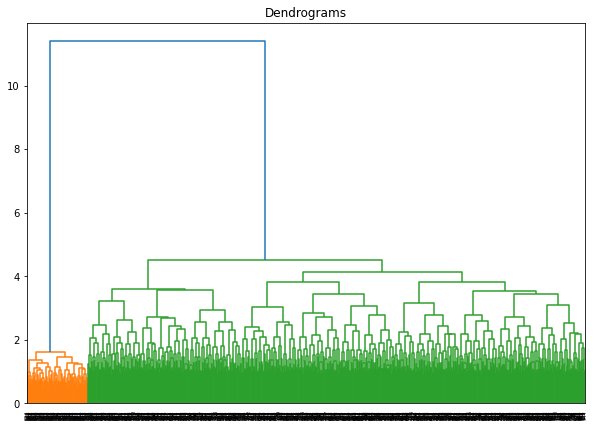

In [22]:
# Create dendogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(genes_normalized, method='ward'))

In [23]:
# Apply heirarchial clustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster_preds = cluster.fit_predict(genes_normalized)

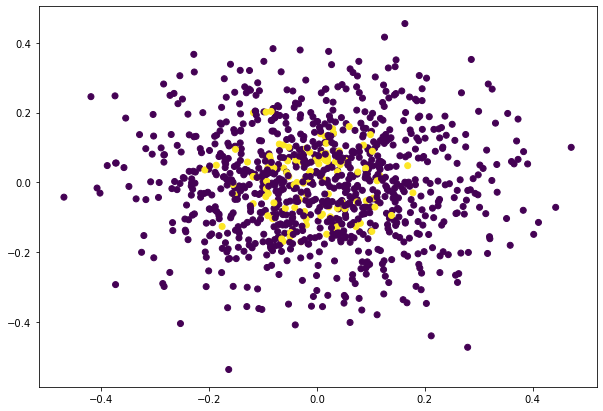

In [24]:
# Plot data with clusters
genes_normalized_small = genes_normalized.iloc[:,0:2]
genes_normalized_small.columns = ['Tissue 1', 'Tissue 2']

plt.figure(figsize=(10, 7))  
plt.scatter(genes_normalized_small['Tissue 1'], genes_normalized_small['Tissue 2'], c=cluster.labels_) 